# Lab 8: Supervised Learning  

In this lab, we will keep working on supervised learning. We will first learn how to train decision trees and we will see that doing this using `sklearn` is not much different from running kNN algorithm.

## Lab 8.A: Decision Trees (50% of grade)

The following code is copied from http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py. You should be able to run the code without error messages.

(61600,)
(220, 280)
(110600,)
(395, 280)
(61600,)
(220, 280)
(86900,)
(395, 220)
(48400,)
(220, 220)
(86900,)
(220, 395)


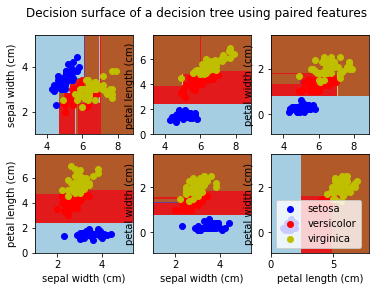

In [41]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    
    # Train
    clf = DecisionTreeClassifier()  # calls the classifier
    clf.fit(X, y)                   # fits the data using only the current pair of attributes

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1   # takes the min and max value of the first attribute
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1   # takes the min and max value of the second attribute
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    # np.arange() returns an evenly spaced array between x_min and x_max; and between y_min and y_max
    # so the array covers all the range where the data is present in that attribute
    # meshgrid outputs the needed matrices for plotting
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel() turns the matrix into an array
    print Z.shape
    Z = Z.reshape(xx.shape)
    print Z.shape

    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) # plots filled contours

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])   # writes the title for the axis in the plot
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],  #plots the actual data 
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

**Question 1**. Study the code and try to understand what is happening in each line. Explain what the images plotted by the code show.

The code above was commented with the proper explanation for each line. The images plotted are the pairs of attributes and the result of the training with decision trees for each pair, that is, the prediction.

**Question 2**. Train a decision tree on Iris data set using all 4 attributes. Before training, remember to reserve 50 randomly selected examples for test set and train on the remaining 100 examples. Use the default parameter values (no need to put anything in parenthesis in `DecisionTreeClassifier`). How long did it take to train the decision tree? Report the accuracy on the test set. Print the confusion matrix. Report the accuracy on the training set. Discuss if you are seeing any difference and why. Compare the accurracy with the accuracy you got with kNN. Report on the size of the resulting tree (how many nodes are there and what is the depth of the tree). Visualize the tree (consider using `sklearn.tree.export_graphviz`).

Code is below.

The training data had 100% accuracy which is expected. The test data has near to 98% depending on the random split of data. kNN of lab 07 had an worse result in the end. The tree has 7 nodes and the depth is 3.

**Question 3**. Train a decision tree on Iris data, but this time play with the parameters. You can se the detailed list of different choices at http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier. Experiment with `criterion` (default is `gini`, try to train using `entropy`), `max_depth` (try to set it to 2, 3, 4), `min_samples_leaf` (default is 1, try with 5, 15). See if you can find a combination of parameters that improves accuracy on the test set. Report what you found.

# Question 2

In [130]:
import random
from sklearn.metrics import confusion_matrix

iris = load_iris()

training_id = random.sample(range(150), 100)
training_id.sort()
test_id = [x for x in range(150) if x not in training_id]

X = iris.data[training_id, :]
X_test = [(j) for (i, j) in enumerate(iris.data) if i not in training_id]
y = iris.target[training_id]
y_test = [(j) for (i, j) in enumerate(iris.target) if i not in training_id]

print training_id
print test_id
clf = DecisionTreeClassifier()
clf.fit(X, y)

Z = clf.predict(np.c_[X_test]) # ravel() turns the matrix into an array

print Z.shape
j = 0
correct = 0
for i in test_id:
    if iris.target[i] == Z[j]:
        correct = correct + 1
    j = j + 1

acc_test = float(correct)/50
print "Accuracy for test data:"
print acc_test

print "Confusion matrix:"
print confusion_matrix(y_test, Z)

[0, 1, 3, 5, 6, 7, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 38, 39, 41, 42, 45, 46, 47, 50, 55, 56, 57, 58, 61, 62, 63, 64, 66, 67, 68, 70, 72, 73, 74, 75, 76, 78, 81, 83, 84, 85, 87, 90, 92, 93, 94, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 109, 110, 114, 115, 118, 119, 120, 122, 123, 129, 131, 132, 134, 136, 137, 138, 140, 141, 142, 144, 145, 146, 147, 148, 149]
[2, 4, 8, 9, 10, 15, 23, 29, 37, 40, 43, 44, 48, 49, 51, 52, 53, 54, 59, 60, 65, 69, 71, 77, 79, 80, 82, 86, 88, 89, 91, 95, 101, 108, 111, 112, 113, 116, 117, 121, 124, 125, 126, 127, 128, 130, 133, 135, 139, 143]
(50,)
Accuracy for test data:
0.98
Confusion matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  0 18]]


In [132]:
X_test = [(j) for (i, j) in enumerate(iris.data) if i in training_id]


Z = clf.predict(np.c_[X]) # ravel() turns the matrix into an array

j = 0
correct = 0
for i in training_id:
    if iris.target[i] == Z[j]:
        correct = correct + 1
    j = j + 1
        
acc_test = float(correct)/100
print "Accuracy for training data:"
print acc_test

print "Confusion matrix:"
print confusion_matrix(y, Z)

Accuracy for training data:
1.0
Confusion matrix:
[[36  0  0]
 [ 0 32  0]
 [ 0  0 32]]


In [83]:
print clf.tree_.node_count
print clf.tree_.max_depth

7
3


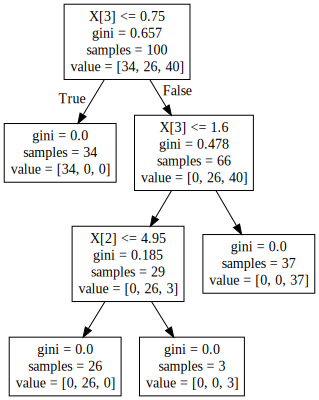

In [100]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph 

# Question 3

In [146]:
iris = load_iris()

training_id = random.sample(range(150), 100)
training_id.sort()
test_id = [x for x in range(150) if x not in training_id]

X = iris.data[training_id, :]
X_test = [(j) for (i, j) in enumerate(iris.data) if i not in training_id]
y = iris.target[training_id]
y_test = [(j) for (i, j) in enumerate(iris.target) if i not in training_id]


clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X, y)

Z = clf.predict(np.c_[X_test]) # ravel() turns the matrix into an array

j = 0
correct = 0

for i in test_id:
    if iris.target[i] == Z[j]:
        correct = correct + 1
    j = j + 1
        
acc_test = float(correct)/50
print "Accuracy for test data:"
print acc_test

print "Confusion matrix:"
print confusion_matrix(y_test, Z)

Accuracy for test data:
0.92
Confusion matrix:
[[20  0  0]
 [ 0 11  3]
 [ 0  1 15]]


Resulted accuracy increased 2% for test data with entropy.
The results, actually, are really similar in the end even though we change the parameters, they are varying from 92% to 98% for the same parameters, with just a different data split.

## Lab 8.B. Doing supervised learning on churn data set (50 points)

In this part of the lab, you will be using kNN and decision trees on the problem of churn prediction. 

In [153]:
import pandas as pd
#data set from yhathq: http://blog.yhathq.com/posts/predicting-customer-churn-with-sklearn.html
dfchurn = pd.read_csv("https://raw.githubusercontent.com/CIS3715-temple-2018/CIS3715-temple-2018.github.io/master/churn.csv")
dfchurn.head(10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


This is a dataset from a telecom company, of their customers. Based on the recorded attributes of these customers and their calling plans, we want to predict if a customer is likely to leave the company (the last column in the table). This is expensive for the company, as a lost customer means lost monthly revenue.

**Question 4**. Perform EDA on the data set to get an insight into the data, including answering what fraction of customers left the company, what are attributes about, what are their properties, how are attributes and the churn related. Prepare 1-2 page document summarizing the interesting aspects of the data.

**Question 5**. Train and test a kNN classifier. First, select 1,000 random customers and save them for testing. You can use the remaining ones for training. Then, you will need to decide what to do with the categorical attributes. The easiest is to simply ignore them, but it would reduce your accuracy. A better way (you have to try it) is to convert the categorical attributes to numbers. It is up to you to decide what distance measure to use, how to pick `k`, and make any other decision that will help you increase the accuracy. For example, it might help you to scale the attributes to the same range. Remember that any transformation you do on the training data needs to be repeated on the test data. Report on the best accuracy you are able to get (please do not forget to split the data into training and test before proceeding). Also report the confusion matrix. Provide a discussion of your choices.

**Question 6**. Train and test a decision tree. Do it on the sane traing-test split you used in *Question 5*. Your goal is to try to figure out the best way to train an accurate decision tree. Report on your findings. Compare your results with the kNN results.

**Question 7**. Lets assume you have to use your churn classifier to contact your existing customers and try try to prevent churn. The cost of each contact is \$10. Let us assume each contacted customer will decide to stay. Your profit in keeping a customer is \$30. Given your best decision tree and kNN classifiers, what is the expected profit on your test data? Can you try to train another classifier that would have even larger profit?

In [232]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  



In [233]:
col_names = dfchurn.columns.tolist()

print "Column names:"
print col_names

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


[483, 2850]
Ratio of customers that left:
14.4914491449 %


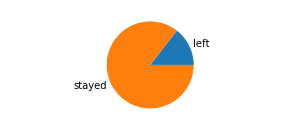

In [234]:
cust_non = [0, 0]
for i in y:
    if i == 1:
        cust_non[0] = cust_non[0] + 1
    if i == 0: 
        cust_non[1] = cust_non[1] + 1
        
print cust_non

plt.figure(figsize=(5,2))
plt.axis("equal")
plt.pie(cust_non,labels=['left','stayed'])

ratio = float(cust_non[0])/(cust_non[0] + cust_non[1])
print "Ratio of customers that left:"
print ratio*100, "%"

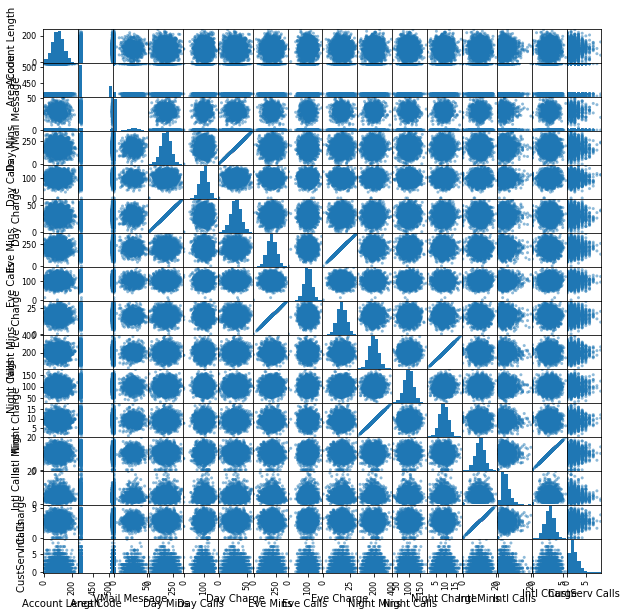

In [235]:
pd.plotting.scatter_matrix(dfchurn,  figsize=(10, 10));

Looking at the scatter matrix it seems that no two attributes seem to be correlated, except for the Charge and Minutes.

In [236]:
print "Average of day minutes of former custmers:" 
print dfchurn[dfchurn['Churn?'] == 'True.']['Day Mins'].mean()
print "Average of day minutes of current custmers:" 
print dfchurn[dfchurn['Churn?'] == 'False.']['Day Mins'].mean()

print "Average of evening minutes of former custmers:" 
print dfchurn[dfchurn['Churn?'] == 'True.']['Eve Mins'].mean()
print "Average of evening minutes of current custmers:" 
print dfchurn[dfchurn['Churn?'] == 'False.']['Eve Mins'].mean()

print "Average of night minutes of former custmers:" 
print dfchurn[dfchurn['Churn?'] == 'True.']['Night Mins'].mean()
print "Average of night minutes of current custmers:" 
print dfchurn[dfchurn['Churn?'] == 'False.']['Night Mins'].mean()



Average of day minutes of former custmers:
206.914078675
Average of day minutes of current custmers:
175.175754386
Average of evening minutes of former custmers:
212.410144928
Average of evening minutes of current custmers:
199.043298246
Average of night minutes of former custmers:
205.231677019
Average of night minutes of current custmers:
200.133192982


It can be seen that in average former customers used more the service than current customes in all three periods of the day.

In [237]:
print "Average of customer service calls of former custmers:" 
print dfchurn[dfchurn['Churn?'] == 'True.']['CustServ Calls'].mean()
print "Average of customer service call of current custmers:" 
print dfchurn[dfchurn['Churn?'] == 'False.']['CustServ Calls'].mean()



Average of customer service calls of former custmers:
2.2298136646
Average of customer service call of current custmers:
1.4498245614


Expected result above

##### Question 5

In [346]:
from sklearn import neighbors

churn_result = dfchurn['Churn?']
to_drop = ['State','Area Code','Phone','Churn?']
churn_df = dfchurn.drop(to_drop,axis=1)

yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_df[yes_no_cols] = churn_df[yes_no_cols] == 'yes'

churn_df = churn_df.as_matrix().astype(np.float)

training_id = random.sample(range(3333), 1000)
training_id.sort()
test_id = [x for x in range(3333) if x not in training_id]

X = churn_df[training_id, :]
print len(X)
X_test = churn_df[test_id, :]
print len(X_test)
y = churn_result[training_id]
y_test = churn_result[test_id]

1000
2333


In [347]:
acc_k = []
for k in range(3,100):
    clf = neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(X, y)

    Z = clf.predict(np.c_[X_test]) 

    j = 0
    correct = 0

    for i in test_id:
        if churn_result[i] == Z[j]:
            correct = correct + 1
        j = j + 1

    acc_test = float(correct)/len(test_id)
    print "Accuracy for test data when k is =", k
    acc_k.append(acc_test)
    print acc_test

Accuracy for test data when k is = 3
0.862837548221
Accuracy for test data when k is = 4
0.873981997428
Accuracy for test data when k is = 5
0.874839262752
Accuracy for test data when k is = 6
0.879982854694
Accuracy for test data when k is = 7
0.881697385341
Accuracy for test data when k is = 8
0.878268324046
Accuracy for test data when k is = 9
0.882126018003
Accuracy for test data when k is = 10
0.879982854694
Accuracy for test data when k is = 11
0.880411487355
Accuracy for test data when k is = 12
0.878696956708
Accuracy for test data when k is = 13
0.880840120017
Accuracy for test data when k is = 14
0.878268324046
Accuracy for test data when k is = 15
0.87912558937
Accuracy for test data when k is = 16
0.877839691384
Accuracy for test data when k is = 17
0.876553793399
Accuracy for test data when k is = 18
0.876553793399
Accuracy for test data when k is = 19
0.877839691384
Accuracy for test data when k is = 20
0.876125160737
Accuracy for test data when k is = 21
0.876553793399
A

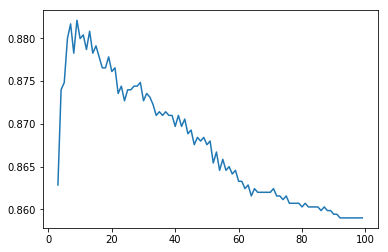

In [348]:
plt.plot(range(3,100), acc_k)
plt.show()

It can be seen above that the best result for kNN is when k is around 9.

In [350]:
print "Confusion matrix:"
print confusion_matrix(y_test, Z)

Confusion matrix:
[[2004    0]
 [ 329    0]]


#### Question 6

In [372]:
acc_tree = []
for depth in range(1,10):
    for n_features in range(1,15):
        clf = DecisionTreeClassifier(criterion='entropy',max_depth = depth, max_features = depth)
        clf.fit(X, y)

        Z = clf.predict(np.c_[X_test])

        j = 0
        correct = 0

        for i in test_id:
            if churn_result[i] == Z[j]:
                correct = correct + 1
            j = j + 1

        acc_test = float(correct)/len(test_id)
        print "Accuracy for test data for Decision Tree:"
        print 'depth = ', depth
        print 'features = ', n_features
        acc_tree.append([acc_test,depth,n_features])
        print acc_test



Accuracy for test data for Decision Tree:
depth =  1
features =  1
0.858979854265
Accuracy for test data for Decision Tree:
depth =  1
features =  2
0.858979854265
Accuracy for test data for Decision Tree:
depth =  1
features =  3
0.858979854265
Accuracy for test data for Decision Tree:
depth =  1
features =  4
0.858979854265
Accuracy for test data for Decision Tree:
depth =  1
features =  5
0.858979854265
Accuracy for test data for Decision Tree:
depth =  1
features =  6
0.858979854265
Accuracy for test data for Decision Tree:
depth =  1
features =  7
0.858979854265
Accuracy for test data for Decision Tree:
depth =  1
features =  8
0.858979854265
Accuracy for test data for Decision Tree:
depth =  1
features =  9
0.858979854265
Accuracy for test data for Decision Tree:
depth =  1
features =  10
0.858979854265
Accuracy for test data for Decision Tree:
depth =  1
features =  11
0.858979854265
Accuracy for test data for Decision Tree:
depth =  1
features =  12
0.858979854265
Accuracy for 

Accuracy for test data for Decision Tree:
depth =  8
features =  6
0.884269181312
Accuracy for test data for Decision Tree:
depth =  8
features =  7
0.903129018431
Accuracy for test data for Decision Tree:
depth =  8
features =  8
0.927132447492
Accuracy for test data for Decision Tree:
depth =  8
features =  9
0.898842691813
Accuracy for test data for Decision Tree:
depth =  8
features =  10
0.894984997857
Accuracy for test data for Decision Tree:
depth =  8
features =  11
0.897128161166
Accuracy for test data for Decision Tree:
depth =  8
features =  12
0.912130304329
Accuracy for test data for Decision Tree:
depth =  8
features =  13
0.917702528933
Accuracy for test data for Decision Tree:
depth =  8
features =  14
0.915130732962
Accuracy for test data for Decision Tree:
depth =  9
features =  1
0.892413201886
Accuracy for test data for Decision Tree:
depth =  9
features =  2
0.903986283755
Accuracy for test data for Decision Tree:
depth =  9
features =  3
0.911701671667
Accuracy fo

In [385]:
percentages = []
for i in range(len(acc_tree)):
    percentages.append(acc_tree[i][0])

max_index = percentages.index(max(percentages))
print acc_tree[max_index]

[0.936990998714102, 6, 12]


The value accuracy was 93% approx, with max depth 6 and 12 as the the number of features for best split. The result is better than the kNN classifier.